# **House Pricing Forecast**

This notebook is aimed at solving the problem of predicting the actual value of houses in the Australian market. This is done using a regression model with regularization techniques to solve the problem of overfitting

In [366]:
##Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


In [343]:
## Read the dataset

url = "https://raw.githubusercontent.com/adiraptor/house_pricing_assignment/main/data/train.csv"
housing_df = pd.read_csv(url)
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## **EDA**

Performing data cleaning, manipulation and exploratory analysis on the dataset


In [344]:
##Taking a peek at the dataset

housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### **Handling Missing Values**

In [345]:
def calc_missing_values():
    count_not_missing = 0

    for col in housing_df.columns:
        n_miss =  housing_df[[col]].isna().sum()
        if int(n_miss) == 0:
          n_miss = housing_df[[col]].isnull().sum()
        perc = n_miss / housing_df.shape[0] * 100
        if int(n_miss) > 0:
          print('-> %s, Missing: %d (%.1f%%)' % (col, n_miss, perc))
        else:
          count_not_missing+=1
    
    if count_not_missing == housing_df.columns.size:
      print('No missing values in dataframe')
    

In [346]:
##Calulate no of null values for each column

calc_missing_values()

-> LotFrontage, Missing: 259 (17.7%)
-> Alley, Missing: 1369 (93.8%)
-> MasVnrType, Missing: 8 (0.5%)
-> MasVnrArea, Missing: 8 (0.5%)
-> BsmtQual, Missing: 37 (2.5%)
-> BsmtCond, Missing: 37 (2.5%)
-> BsmtExposure, Missing: 38 (2.6%)
-> BsmtFinType1, Missing: 37 (2.5%)
-> BsmtFinType2, Missing: 38 (2.6%)
-> Electrical, Missing: 1 (0.1%)
-> FireplaceQu, Missing: 690 (47.3%)
-> GarageType, Missing: 81 (5.5%)
-> GarageYrBlt, Missing: 81 (5.5%)
-> GarageFinish, Missing: 81 (5.5%)
-> GarageQual, Missing: 81 (5.5%)
-> GarageCond, Missing: 81 (5.5%)
-> PoolQC, Missing: 1453 (99.5%)
-> Fence, Missing: 1179 (80.8%)
-> MiscFeature, Missing: 1406 (96.3%)


Firstly, by reading the data description, I realized that the columns Alley, Basement quality, GarageType etc. all have categorical labels called 'NA', which pandas has recognized as null values. 

Hence I have replaced all the NA values in those columns by 'None', so it becomes a category.

In [347]:
##Read the dataset again using a custom na filter

na_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in na_columns:
    housing_df[col] = housing_df[col].fillna('None')

In [348]:
## Recalculating missing values
calc_missing_values()

-> LotFrontage, Missing: 259 (17.7%)
-> MasVnrType, Missing: 8 (0.5%)
-> MasVnrArea, Missing: 8 (0.5%)
-> Electrical, Missing: 1 (0.1%)
-> GarageYrBlt, Missing: 81 (5.5%)


This gives a much more valid idea of missing values in the dataset

## Missing Value Treatment

Now before imputing or removing data from any of these columns I will attempt to look at the data description to make sense of what the missing value may imply 




#### Lot Frontage

The missing values do not have any common indicators or dependencies on either observed or predictor variables in the dataset. Hence, I will regard them as Data Missing Completely at Random (MCAR).

For deciding strategy of imputation, drawing a box plot on the LotFrontage column.

<AxesSubplot:title={'center':'Dist Plot'}, xlabel='LotFrontage', ylabel='Count'>

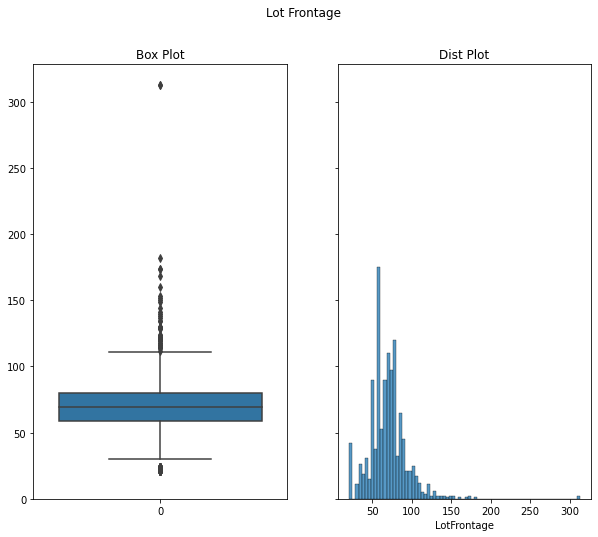

In [308]:
#Using seaborn to plot LotFrontage

fig, axes = plt.subplots(1,2,figsize = (10,8), sharey = True)
fig.suptitle('Lot Frontage')

axes[0].set_title('Box Plot')
axes[1].set_title('Dist Plot')

sns.boxplot(ax=axes[0], data=housing_df['LotFrontage'])
sns.histplot(ax=axes[1], data =housing_df['LotFrontage'])

Here, since the plot appears to be slighlty right-skewed it makes better sense to impute the values with the median rather than the mean, since the outliers will affect the mean

In [349]:
#Filling the column with median

housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())

In [350]:
calc_missing_values()

-> MasVnrType, Missing: 8 (0.5%)
-> MasVnrArea, Missing: 8 (0.5%)
-> Electrical, Missing: 1 (0.1%)
-> GarageYrBlt, Missing: 81 (5.5%)


Thus, the Lot Frontage imputation is done.

#### MasVnrType and MasVnrArea

For the masonry veneer type and area, the rows which are NA also have a lot of the additional feature variables such as PoolQC, Fence and Misc Features as None, so I can safely assume the Masonry veneer type to be none as well. Hence, imputing these as None and 0 respectively.


In [351]:
# Replacing NA with None

housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna('None')
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(0)

calc_missing_values()

-> Electrical, Missing: 1 (0.1%)
-> GarageYrBlt, Missing: 81 (5.5%)


#### Electrical

Since there is only one missing values, imputing it with mode



In [352]:
housing_df['Electrical'] = housing_df['Electrical'].fillna(str(housing_df['Electrical'].mode()))
calc_missing_values()

-> GarageYrBlt, Missing: 81 (5.5%)


#### Garage Year Built

In [353]:
housing_df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

Since the Garage year built is a year column, it doesnt make sense to treat it as a numerical column. Also, all the NA values in the column correspond to those houses which do not have garages.<br/> Hence, I have to convert this column into a categorical one using time periods (year_start - year_end) with **None** as one of the categories.   

In [354]:
# Converting into categorical column based on year

def get_time_period(year):

  if pd.isna(year):
    return year
  
  else:
    year_start = (year//10)*10
    return str(int(year_start)) + "-" + str(int(year_start) + 10)

housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].map(get_time_period)

In [355]:
housing_df['GarageYrBlt'].value_counts()

2000-2010    399
1990-2000    196
1970-1980    186
1960-1970    185
1950-1960    151
1980-1990     95
1940-1950     55
1920-1930     51
1930-1940     41
1910-1920     14
1900-1910      3
2010-2020      3
Name: GarageYrBlt, dtype: int64

In [316]:
#Replacing all NA's with None

housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna('None')
calc_missing_values()

No missing values in dataframe


All the missing values in the dataset have now been handled

## **Data Analysis**

Heatmap to understand correlation

<AxesSubplot:>

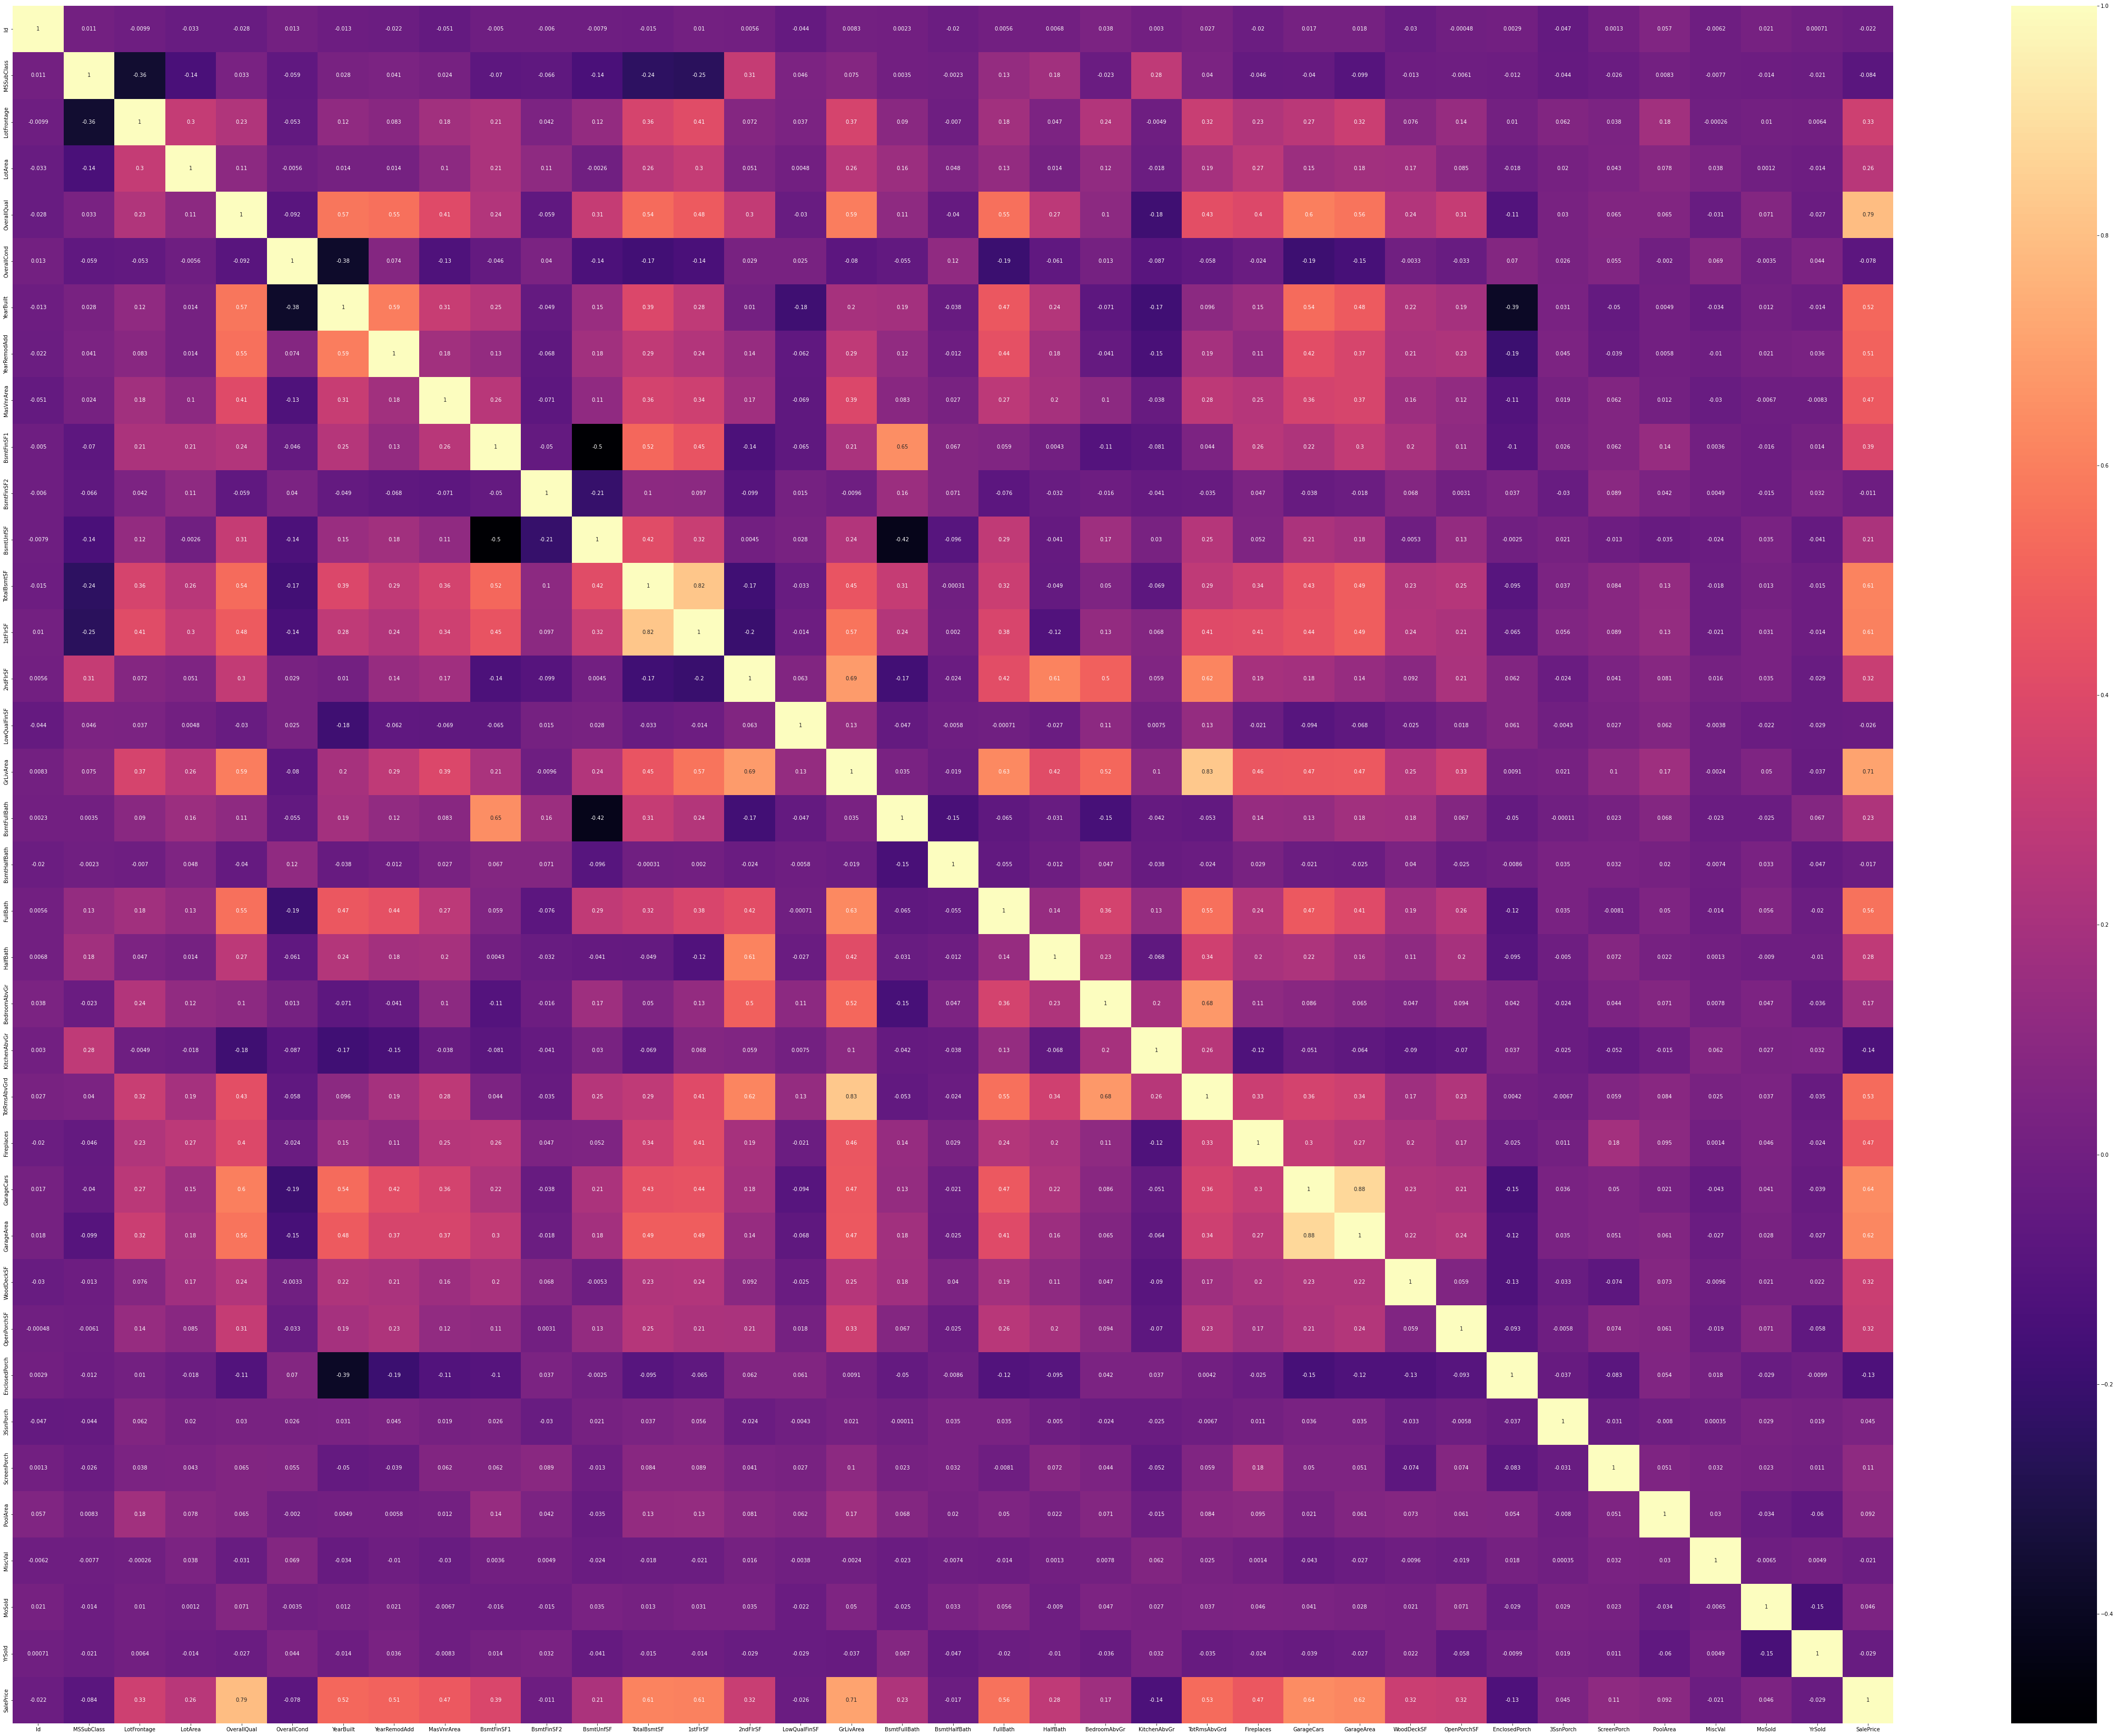

In [117]:
fig, ax = plt.subplots(figsize=(80,60))
sns.heatmap(housing_df.corr(), annot=True, cmap='magma', ax = ax)

#### Analysis of numerical variables

In [356]:
#Getting all the numeric variables out

housing_df_numeric = housing_df.select_dtypes(include=[np.number])

##Remove Id as it is not relevant
housing_df_numeric = housing_df_numeric.drop('Id', axis=1)

housing_df_numeric.shape

(1460, 36)

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


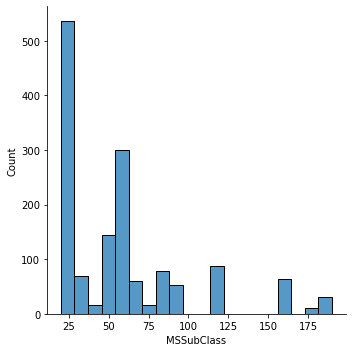

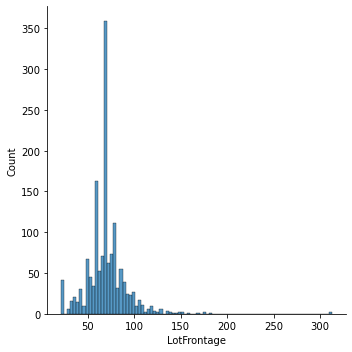

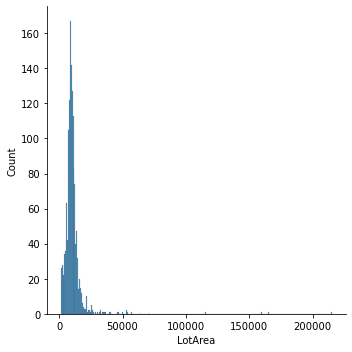

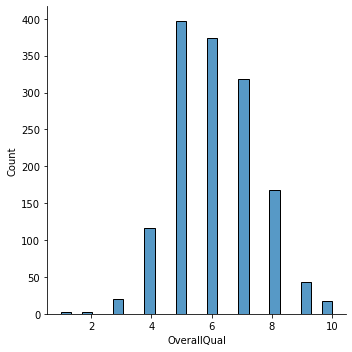

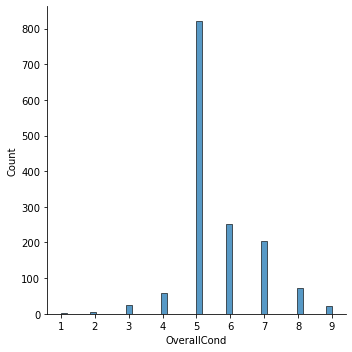

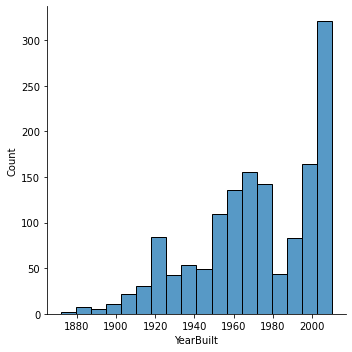

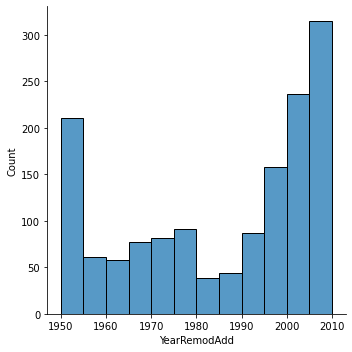

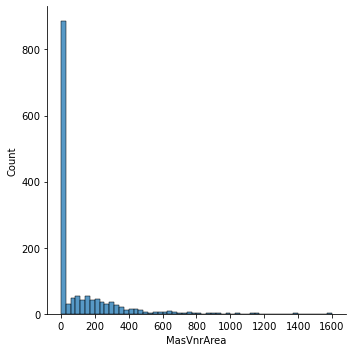

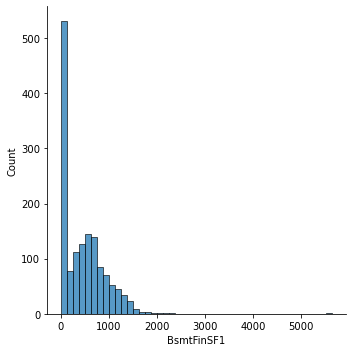

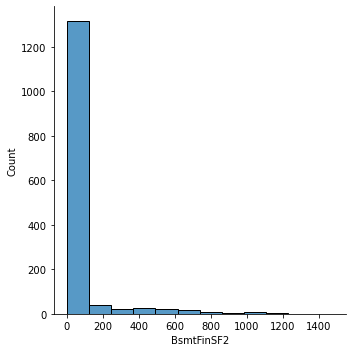

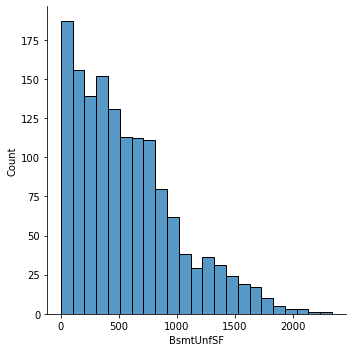

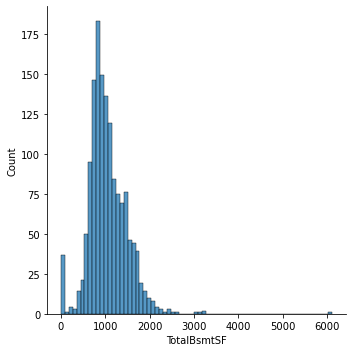

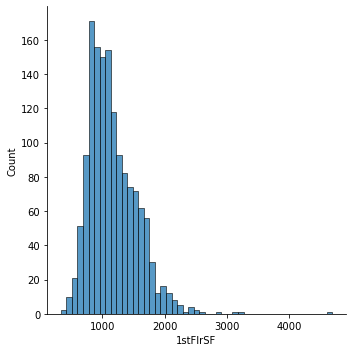

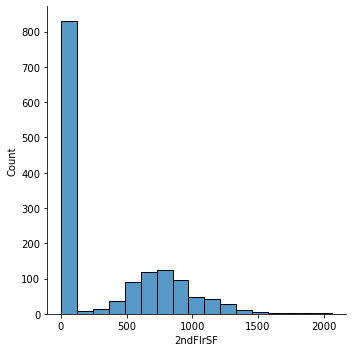

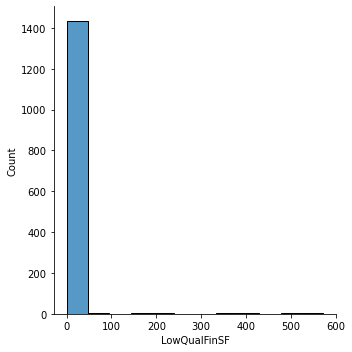

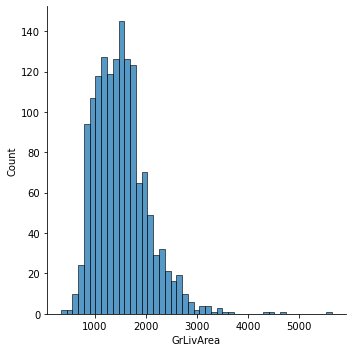

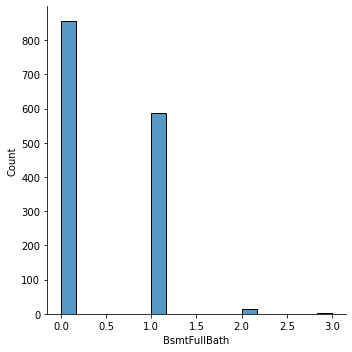

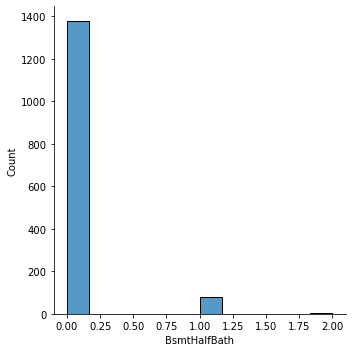

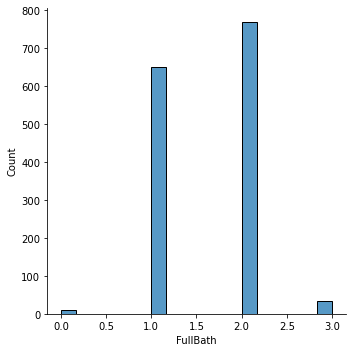

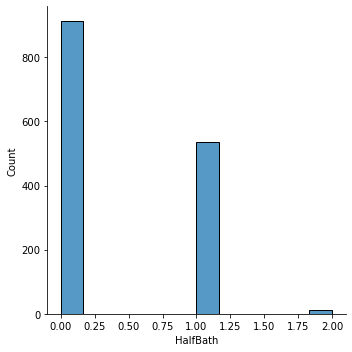

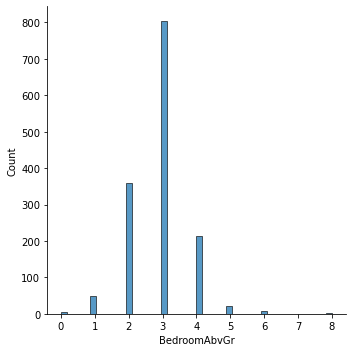

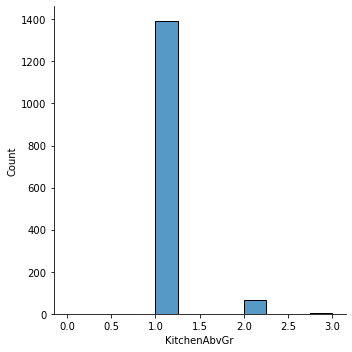

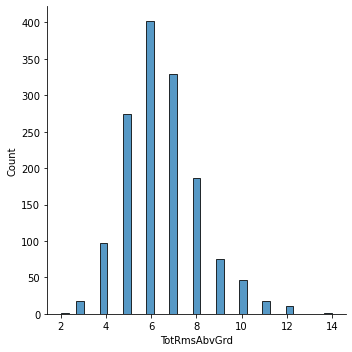

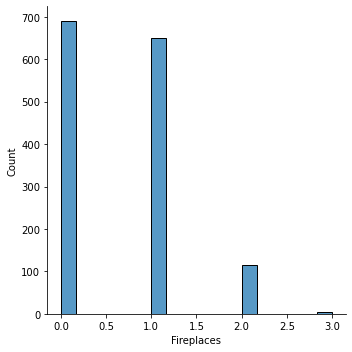

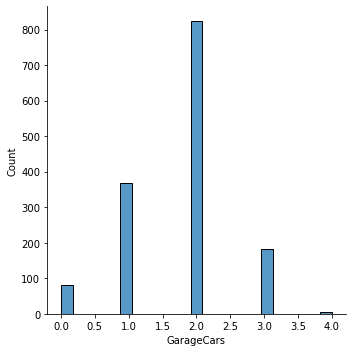

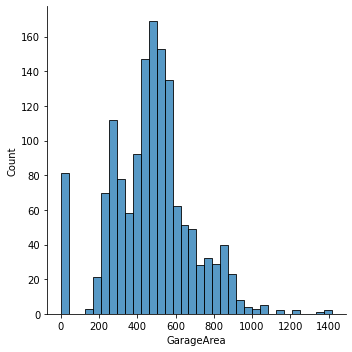

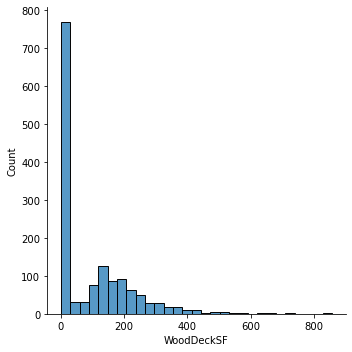

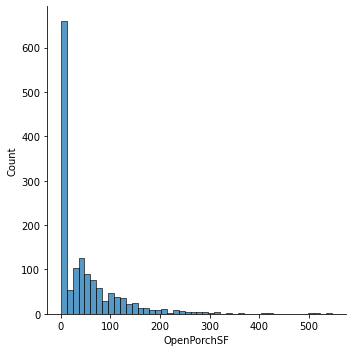

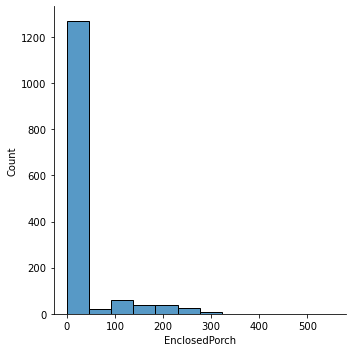

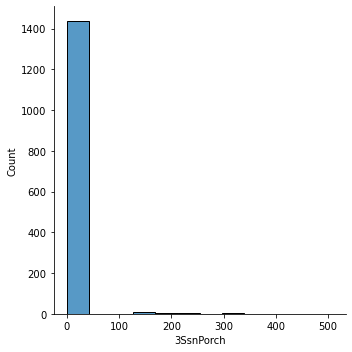

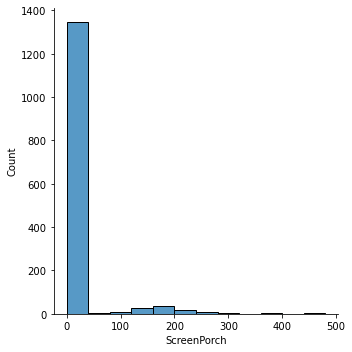

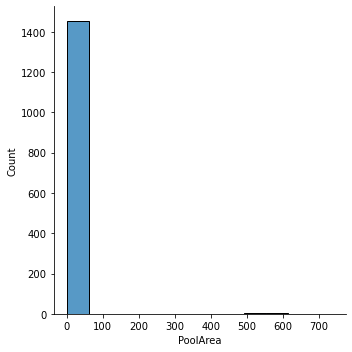

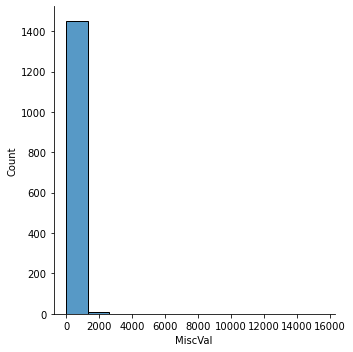

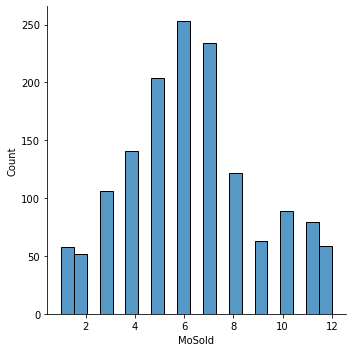

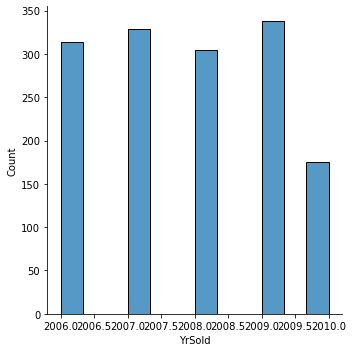

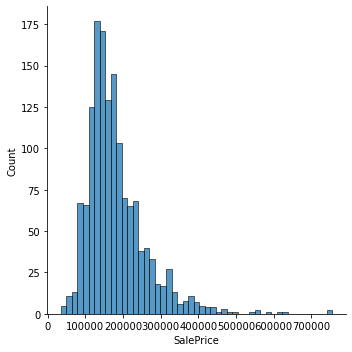

In [244]:
#Using bar plots to study distribution

for col in housing_df_numeric.columns:
    sns.displot(data = housing_df_numeric[col])

It can be seen that all the numeric variables are slightly skewed to the right, however there aren't any outright outliers in the dataset

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


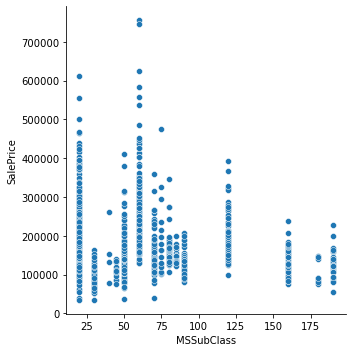

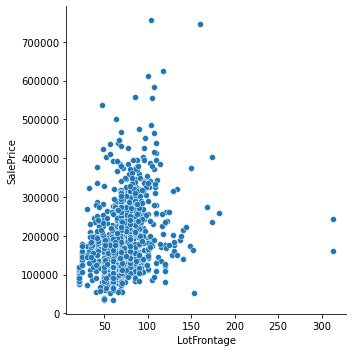

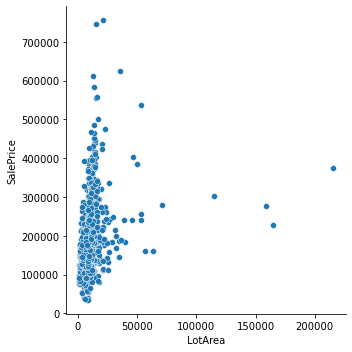

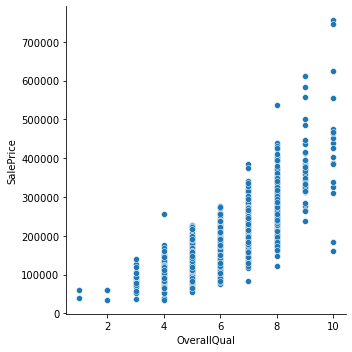

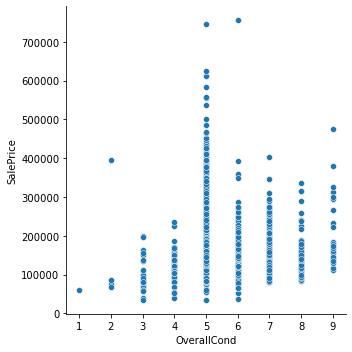

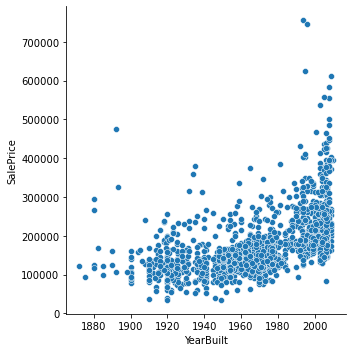

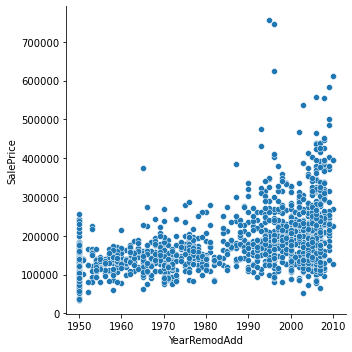

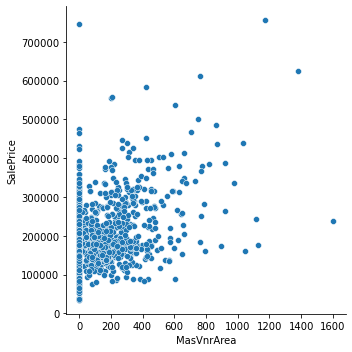

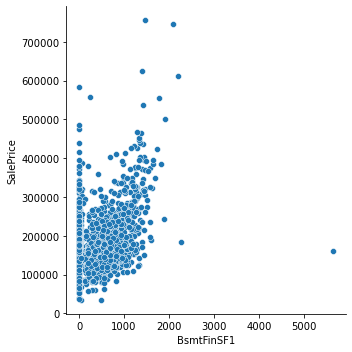

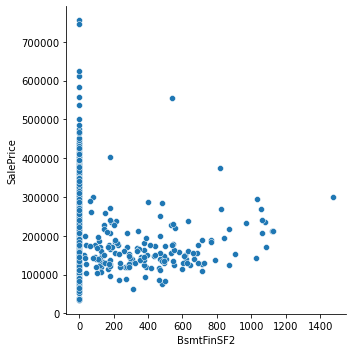

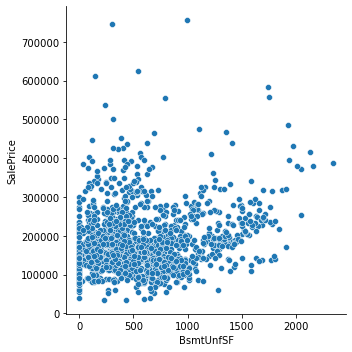

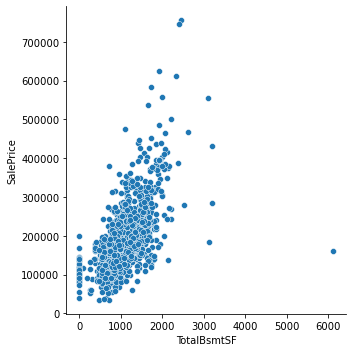

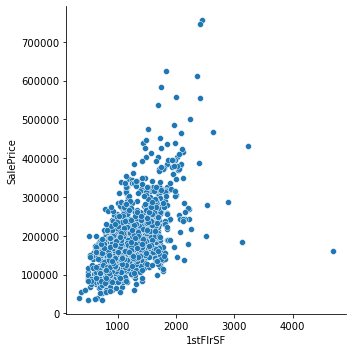

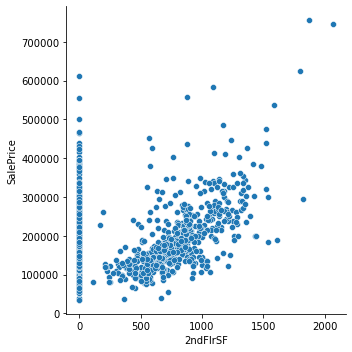

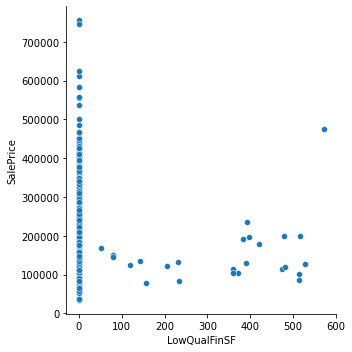

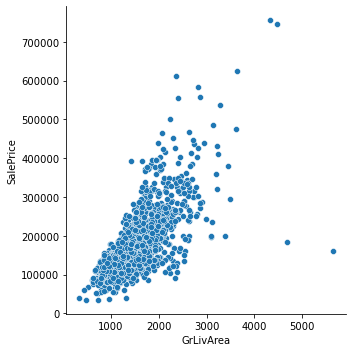

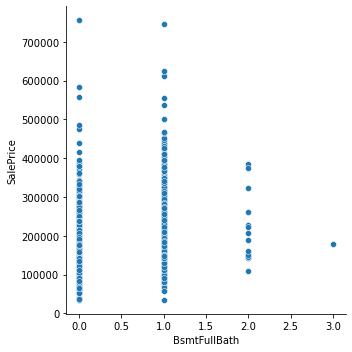

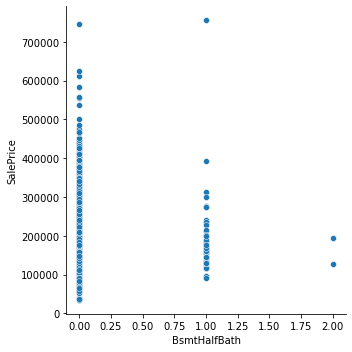

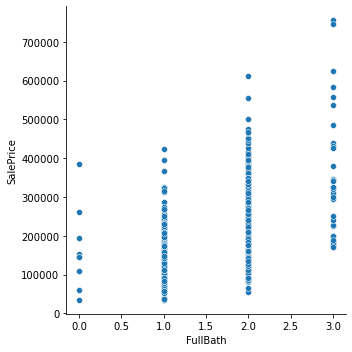

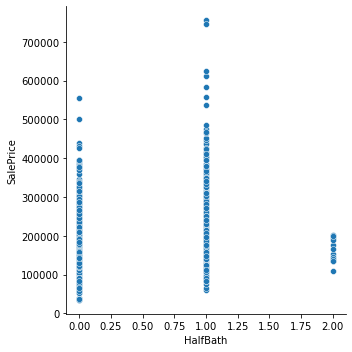

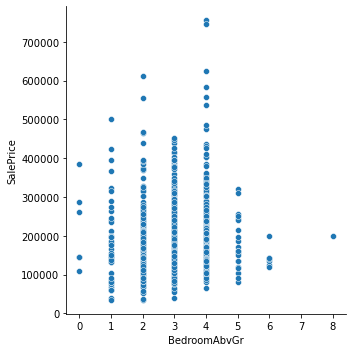

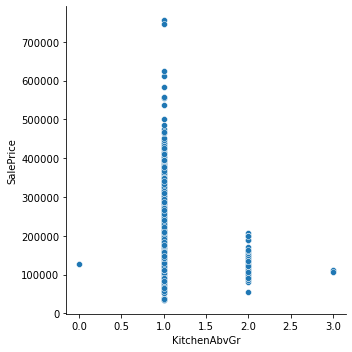

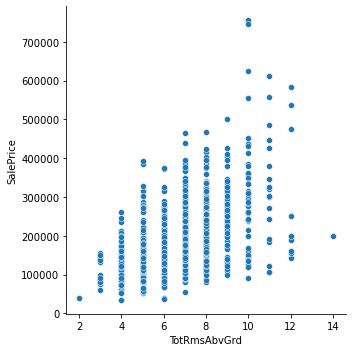

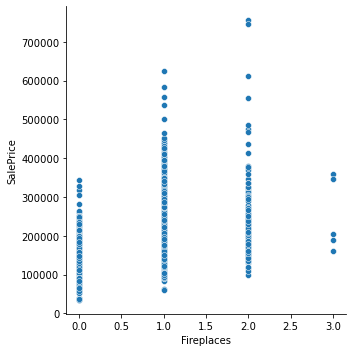

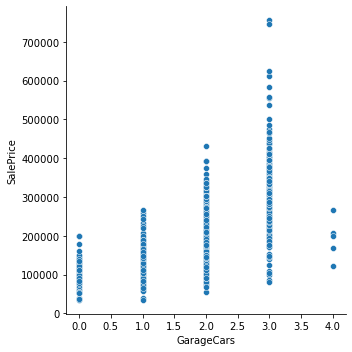

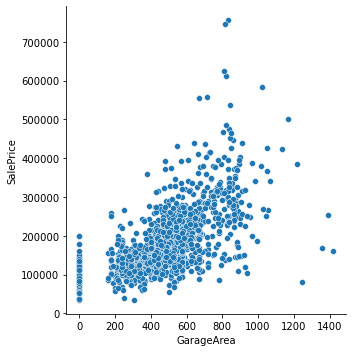

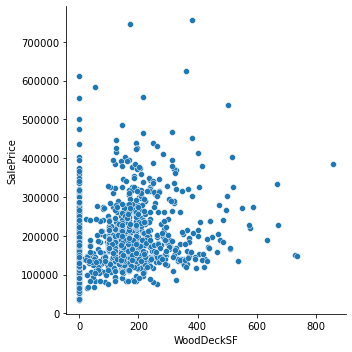

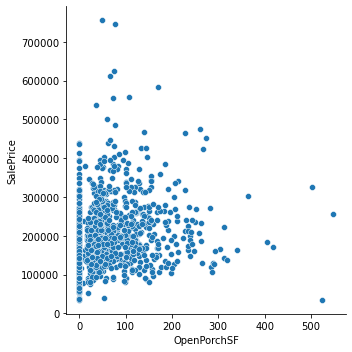

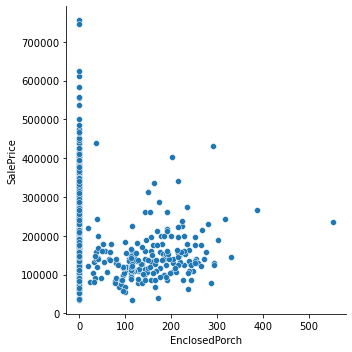

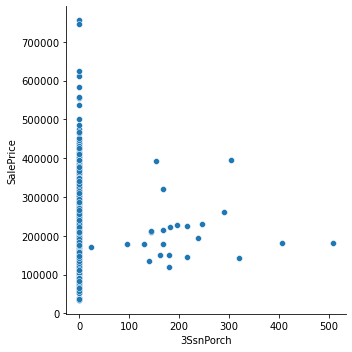

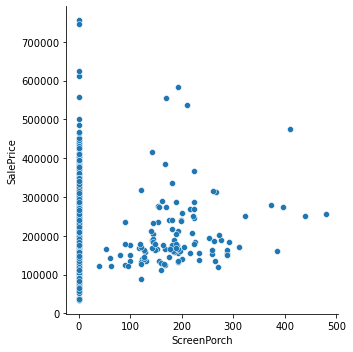

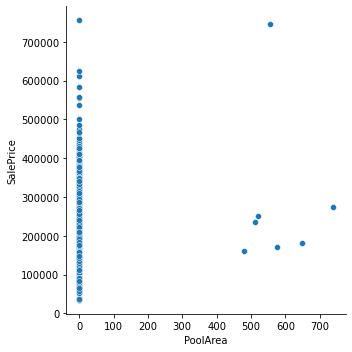

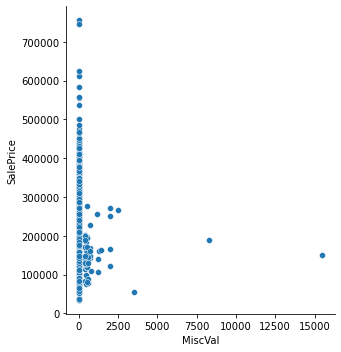

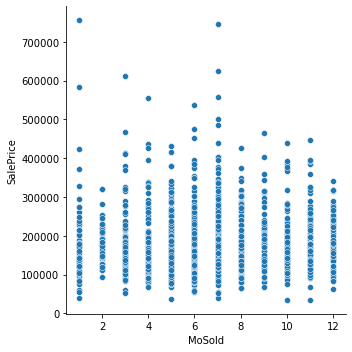

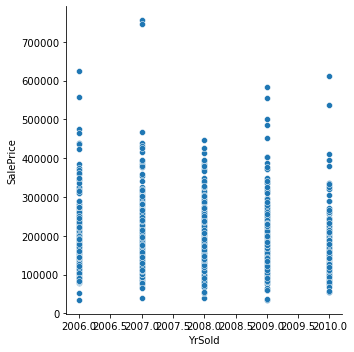

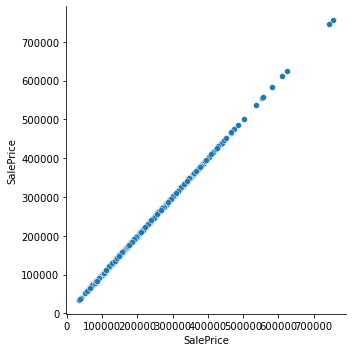

In [35]:
#Plotting the numerical variables vs sale price

for col in housing_df_numeric.columns:
    sns.relplot(x = housing_df_numeric[col], y = housing_df_numeric['SalePrice'], kind = 'scatter')
    

#### Categorical variables

In [357]:
#Getting categorical variables

housing_df_cat = housing_df.select_dtypes(exclude=[np.number])

housing_df_cat.shape

(1460, 44)

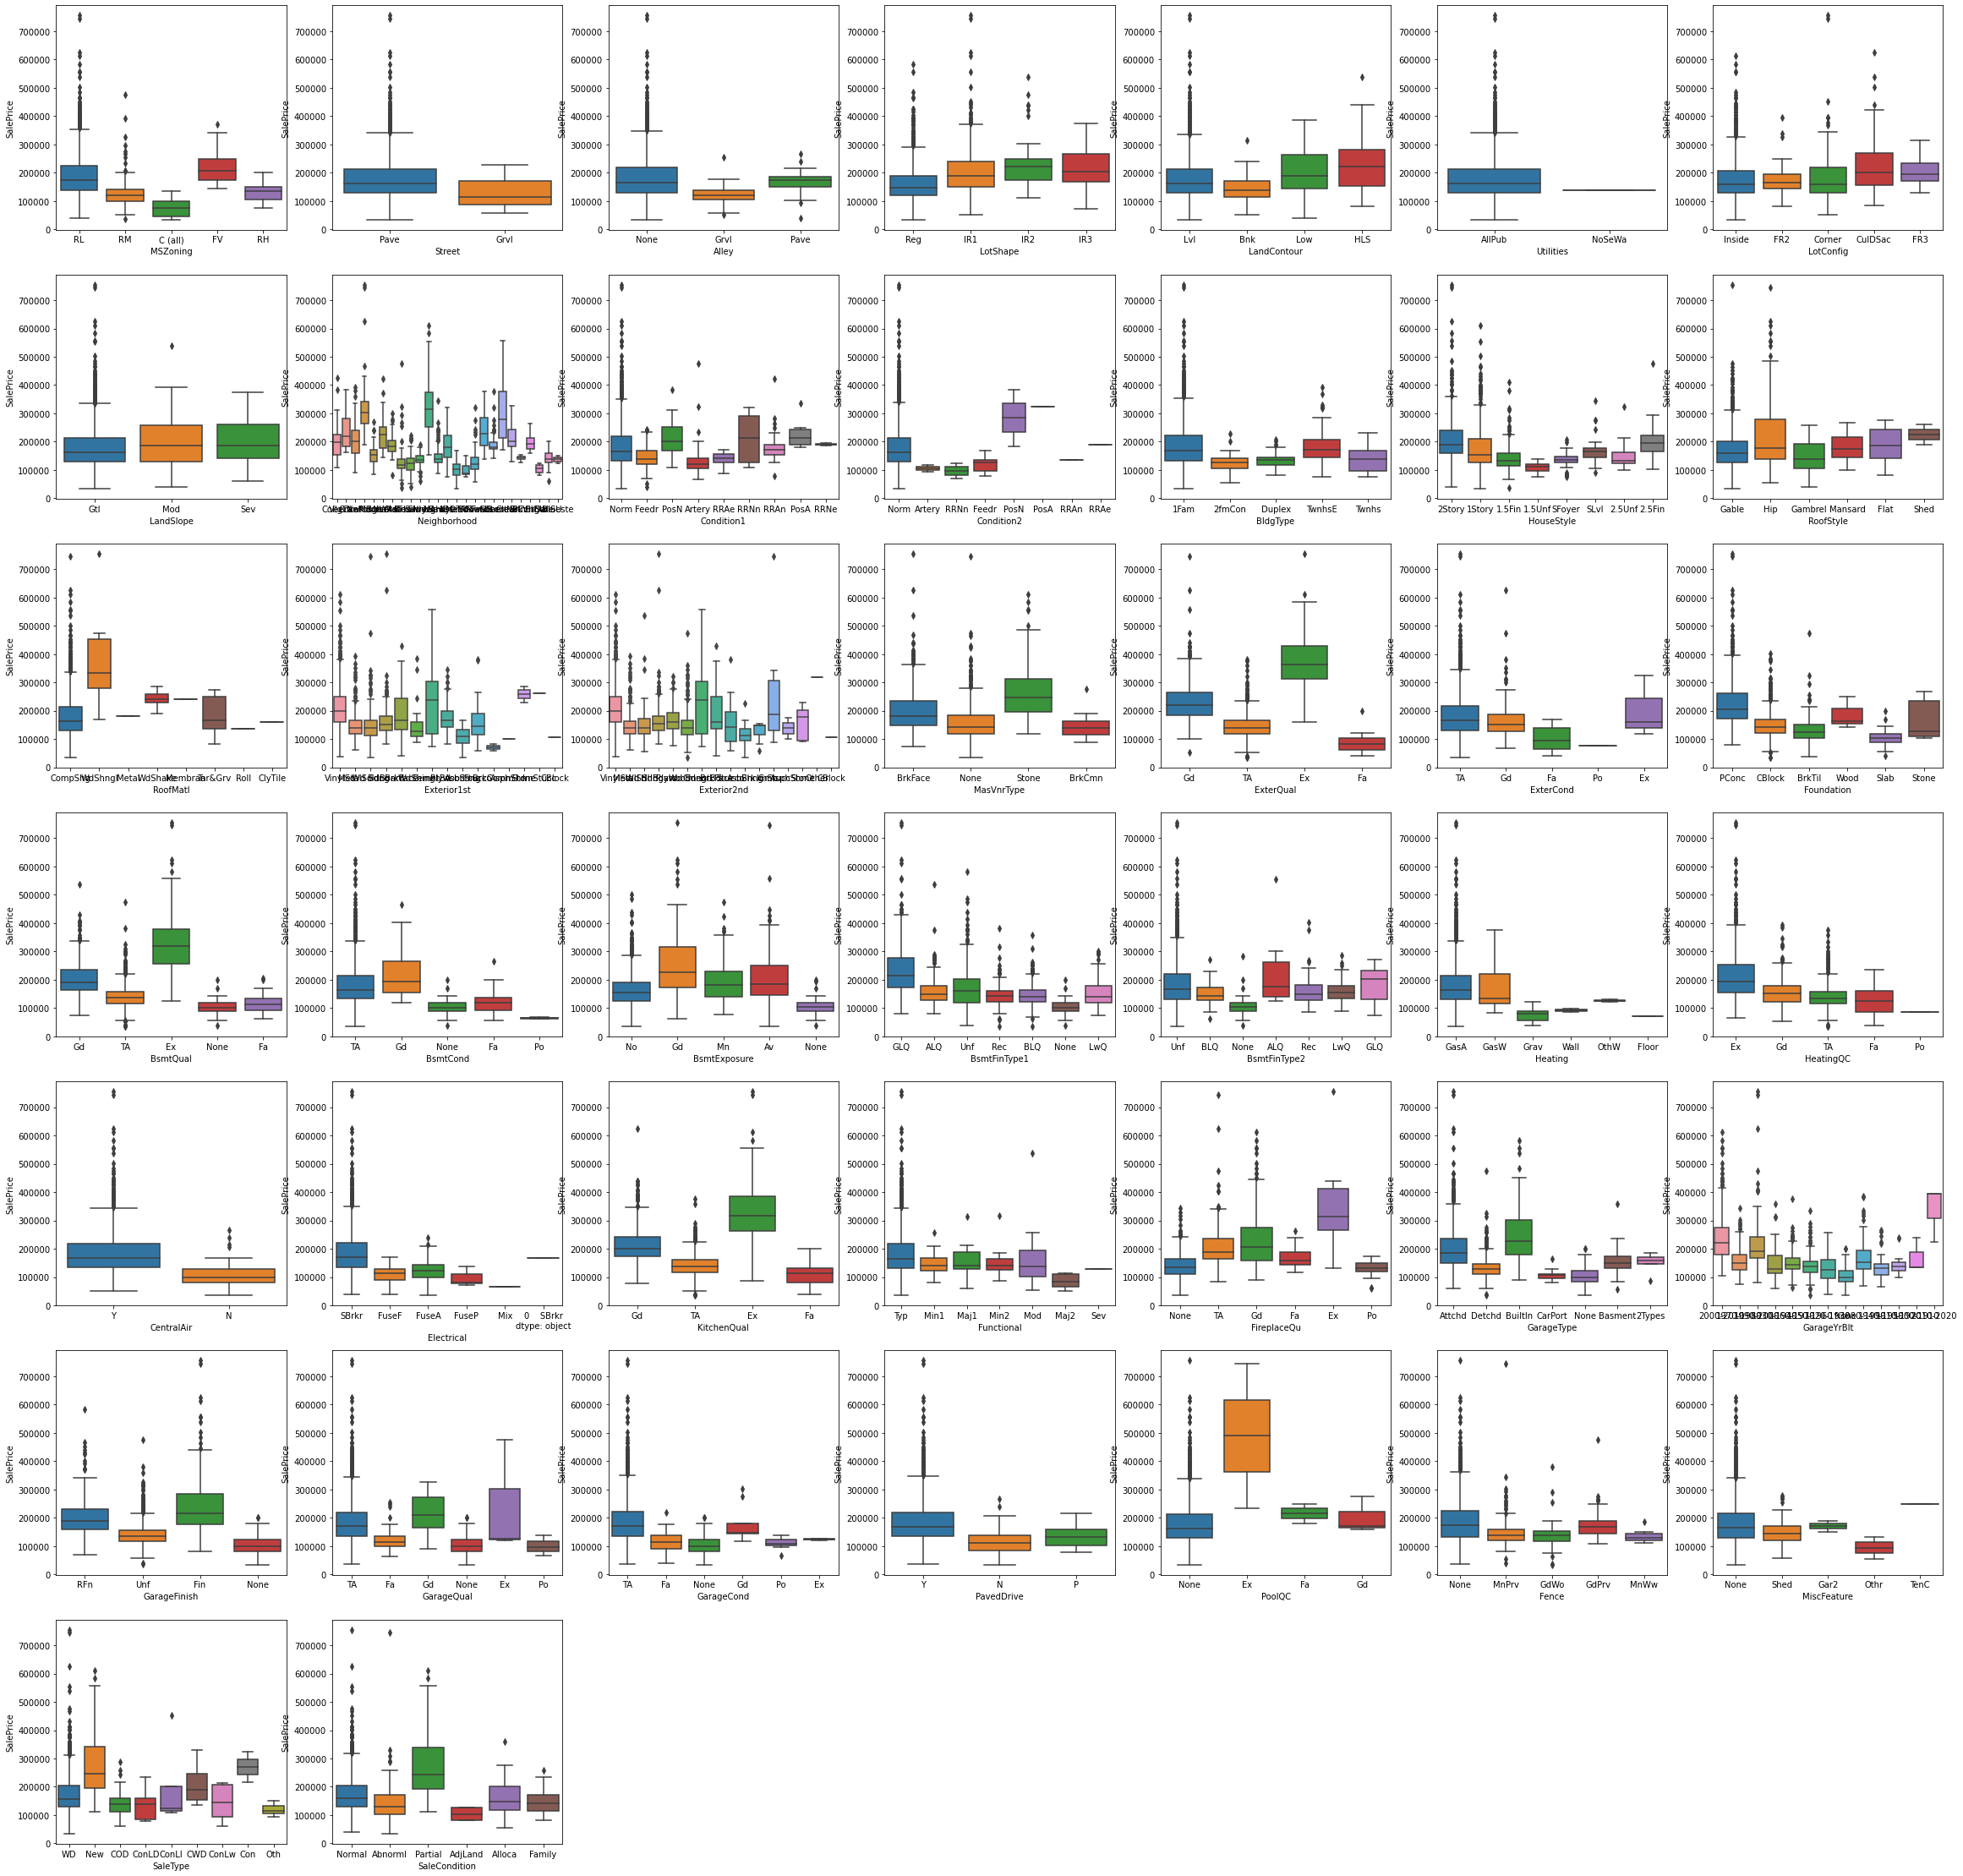

In [319]:
#Plotting them using box plots

plt.figure(figsize=(40,40))

for i, col in enumerate(housing_df_cat.columns, 1):
    plt.subplot(7,7,i)
    sns.boxplot(x = col, y = 'SalePrice', data = housing_df)

As we can see, all the columns - both numeric and categorical - contain a lot of outliers, which we will remove using quantiles

## Standard Linear Regression with RFE

Firstly, getting dummies for all the categorical variables in the dataset

In [358]:
#Get dummies for all the categorical columns

housing_df_cat = housing_df.select_dtypes(exclude=[np.number])

housing_df_final = pd.concat([housing_df, pd.get_dummies(data=housing_df_cat, columns = housing_df_cat.columns, drop_first=True).astype(np.int8)], axis = 1)

housing_df_final.drop(housing_df_cat.columns, axis=1, inplace=True)

housing_df_final.head()


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...               0               0   
1          1976         0.0         978  ...               0               0   
2          2002       162.0         486  ...               0               0   
3          1970         0.0         216  ...               0               0   
4          2000       350.0         655  ...               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 272 columns]

In [359]:
#Drop the Id column

housing_df_final = housing_df_final.drop('Id', axis=1)

housing_df_final.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1460.000000     1460.000000   1460.000000   1460.000000   
mean         0.003425        0.003425      0.083562      0.002055   
std          0.058440        0.058440      0.276824      0.045299   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1460.000000            1460.000000           1460.000000   
mean      0.867808               0.002740              0.008219   
std       0.338815               0.052289              0.090317   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1460.000000           1460.000000            1460.000000  
mean               0.013699              0.820548               0.085616  
std                0.116277              0.383862               0.279893  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 271 columns]

## Split into train and test datasets

In [402]:
# Split into input and target variables

#y = housing_df_final.pop('SalePrice')
X = housing_df_final

print(X.shape)
print(y.shape)
#Split into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


(1460, 270)
(1460,)


### Scaling

Scaling the features using normalization since the distribution of data is not uniform, which will help in our lasso and ridge regression later



In [441]:
# Fitting the min max scaler on the train dataset

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))


In [442]:
# Linear Regression using sklearn

regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train_scaled)

#Perform RFE with cross validation for selecting features

rfe = RFECV(regressor, step=1)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('MSSubClass', False, 42),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 94),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 2),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 116),
 ('BsmtHalfBath', False, 111),
 ('FullBath', False, 98),
 ('HalfBath', False, 169),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 30),
 ('Fireplaces', False, 180),
 ('GarageCars', False, 195),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 93),
 ('OpenPorchSF', False, 77),
 ('EnclosedPorch', False, 106),
 ('3SsnPorch', False, 155),
 ('ScreenPorch', False, 82),
 ('PoolArea', False, 102),
 ('MiscVal', False, 108),
 ('MoSold', False, 188),
 ('YrSold', False, 206),
 ('MSZoning_FV', False, 35),
 ('MSZoning_RH', F

In [443]:
# Creating X_test dataframe with RFE selected variables
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [444]:
#Scaling

X_train_scaled = x_scaler.fit_transform(X_train_rfe)

# Linear Regression using sklearn

regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [445]:
#Predict on our test set.

# Remove the rfe eliminated variables
X_test_rfe = X_test[col]

#Apply scaling
X_test_scaled = x_scaler.transform(X_test_rfe)
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))

y_pred = regressor.predict(X_test_scaled)

In [446]:
#calculate the R^2 score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

#print out our score properly formatted as a percent.
print("R^2 score:", "{:.4f}%".format(score))
print("MSE", round(mse,2))

R^2 score: -4.6322%
MSE 38237264040.05


As we can see, the r2 score here is negative which measn it has overfit the data. APplying lasso ans ridge regression to see the results - 

In [448]:
#Lasso regression

alphas = [-5, -1, 1e-4, 1e-3, 1e-2, 1, 5]

def test_alpha(a):
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(X_train_scaled, y_train_scaled) 
    pred_test_lasso = model_lasso.predict(X_test_scaled)
    new_score = r2_score(y_test, pred_test_lasso)
    new_mse = mean_squared_error(y_test_scaled, pred_test_lasso)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a, new_score, new_mse))
    
    
for alpha in alphas:
    test_alpha(alpha)

ALPHA: -5.000 R2 SCORE: -5717004.1792% new_score, 38880329844168672.0
ALPHA: -1.000 R2 SCORE: -227115.5714% new_score, 1555388007641374.8
ALPHA: 0.000 R2 SCORE: -4.7232% new_score, 8015004.0
ALPHA: 0.001 R2 SCORE: -4.8279% new_score, 391252.4
ALPHA: 0.010 R2 SCORE: -4.8631% new_score, 0.0
ALPHA: 1.000 R2 SCORE: -4.8631% new_score, 0.0
ALPHA: 5.000 R2 SCORE: -4.8631% new_score, 0.0


Since its not giving us good results in this set, we can try changing range of alphas

In [449]:
alphas = [5, 10, 20, 50 ,100]

for alpha in alphas:
    test_alpha(alpha)

ALPHA: 5.000 R2 SCORE: -4.8631% new_score, 0.0
ALPHA: 10.000 R2 SCORE: -4.8631% new_score, 0.0
ALPHA: 20.000 R2 SCORE: -4.8631% new_score, 0.0
ALPHA: 50.000 R2 SCORE: -4.8631% new_score, 0.0
ALPHA: 100.000 R2 SCORE: -4.8631% new_score, 0.0


In [450]:
alphas = [0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    test_alpha(alpha)

ALPHA: 0.100 R2 SCORE: -4.8631% new_score, 0.0
ALPHA: 0.010 R2 SCORE: -4.8631% new_score, 0.0
ALPHA: 0.001 R2 SCORE: -4.8279% new_score, 391252.4
ALPHA: 0.000 R2 SCORE: -4.7232% new_score, 8015004.0


In [451]:
test_alpha(0.00001)

ALPHA: 0.000 R2 SCORE: -4.6470% new_score, 20669883.3
